<a href="https://colab.research.google.com/github/Geu-Pro2023/Database_Design_Peer_17/blob/main/Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import the necessay libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# DATA COLLECTION & PREPARATION
# Load dataset
df = pd.read_csv("/content/Students_Performance.csv")

In [7]:
# Display the first few rows of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Check the columns
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
# Check basic statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# Check the missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [11]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Check the duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [13]:
# Feature Engineering: Calculate "average_score"
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

In [14]:
# Drop original scores (since we predict average_score)
df.drop(["math score", "reading score", "writing score"], axis=1, inplace=True)

In [15]:
# Encode categorical variables using One-Hot Encoding
df = pd.get_dummies(df, columns=["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"], drop_first=True)

In [16]:
# Define features (X) and target (y)
X = df.drop("average_score", axis=1)
y = df["average_score"]

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

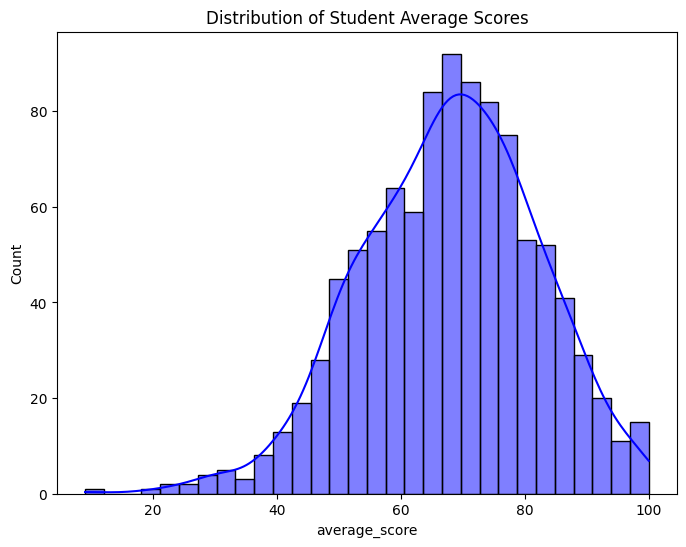

In [19]:
# Distribution of average scores
plt.figure(figsize=(8, 6))
sns.histplot(df["average_score"], kde=True, bins=30, color="blue")
plt.title("Distribution of Student Average Scores")
plt.show()

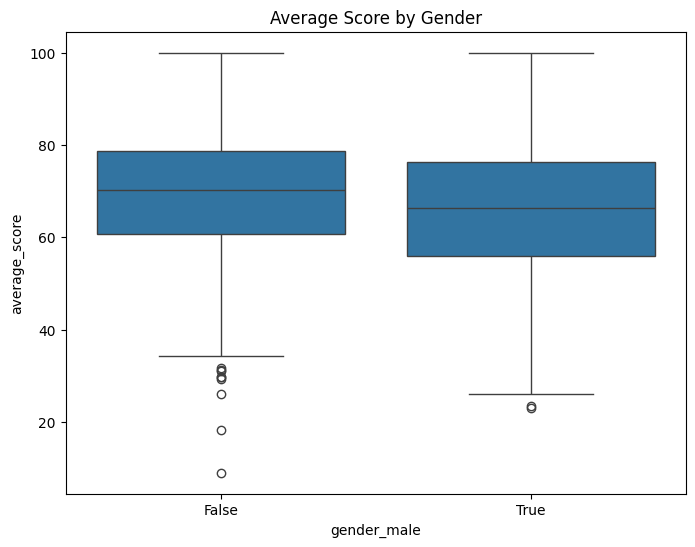

In [20]:
# Boxplot of scores by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x="gender_male", y="average_score", data=df)
plt.title("Average Score by Gender")
plt.show()

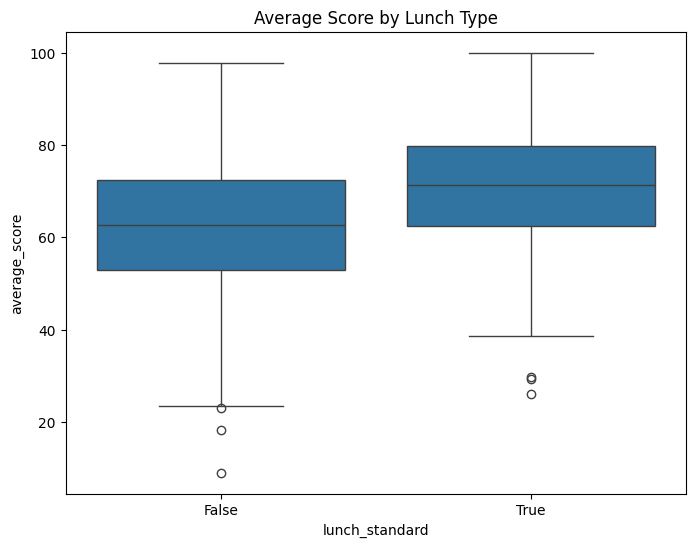

In [21]:
# Boxplot of scores by lunch type
plt.figure(figsize=(8, 6))
sns.boxplot(x="lunch_standard", y="average_score", data=df)
plt.title("Average Score by Lunch Type")
plt.show()

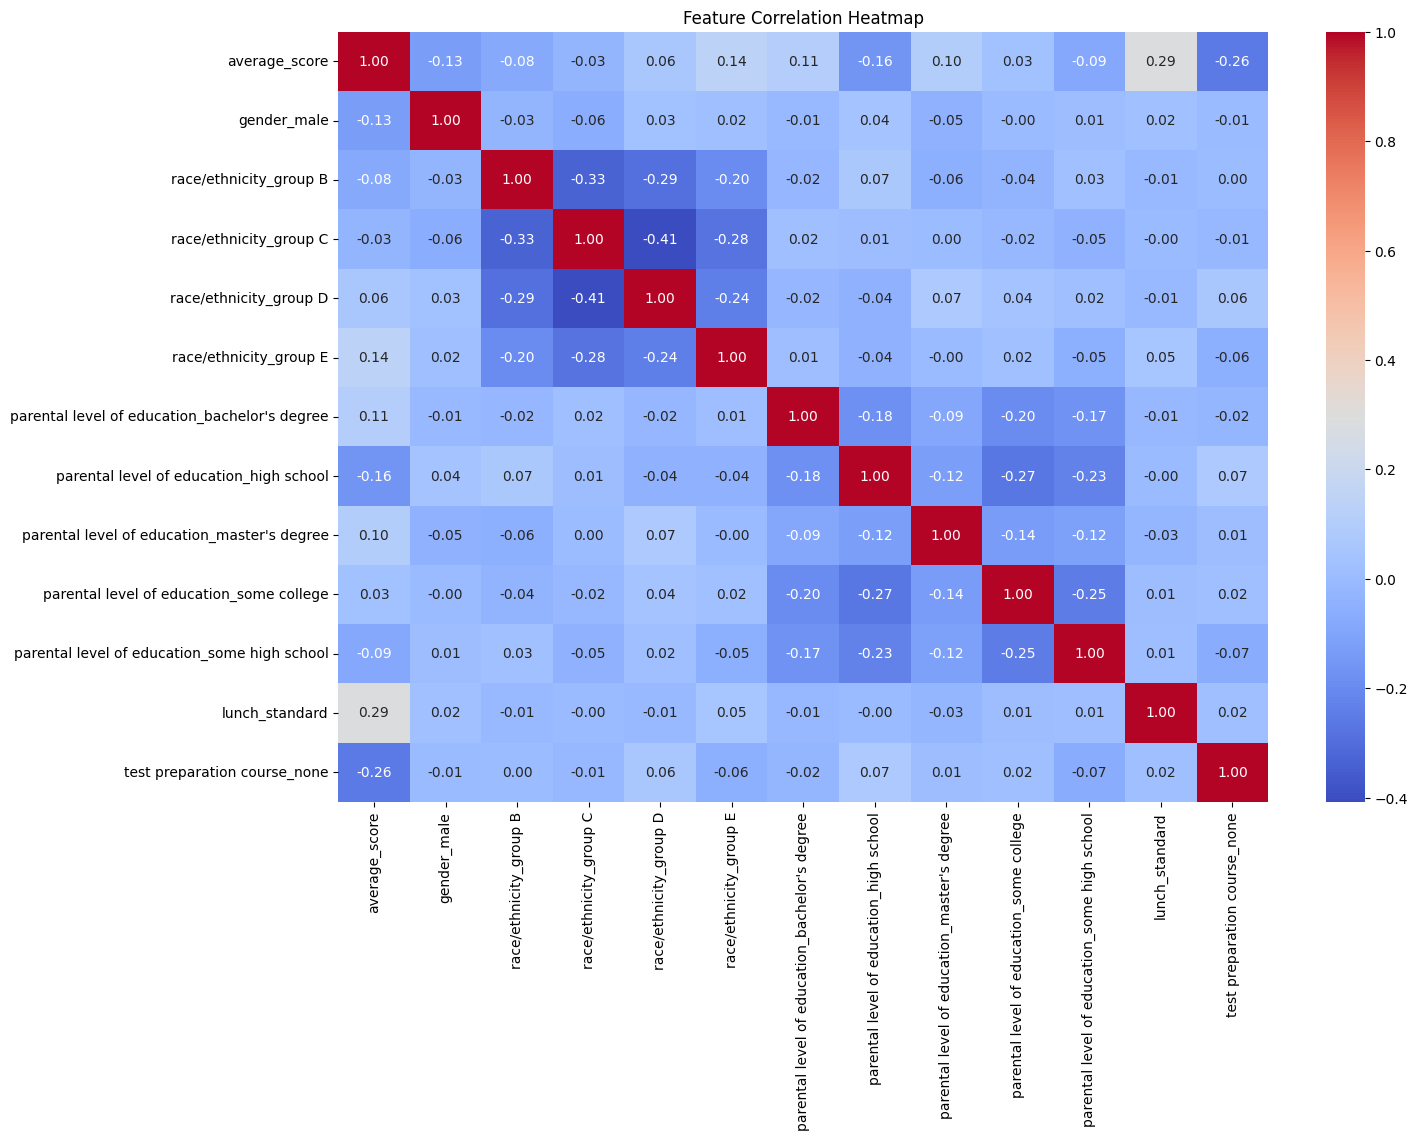

In [22]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# Train a basic model to check feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Get feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

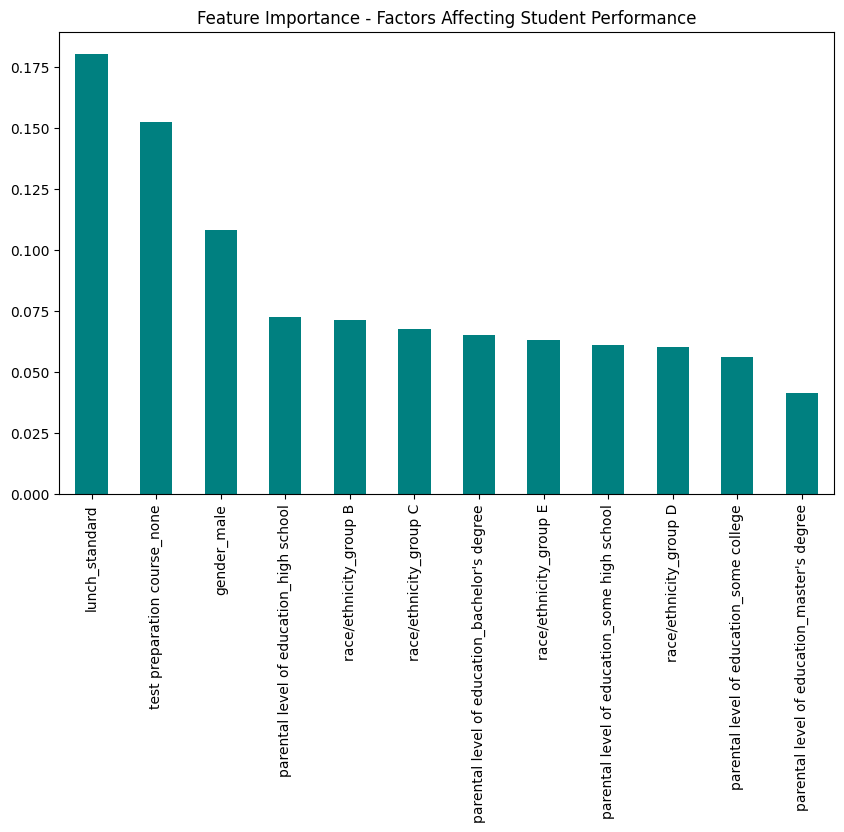

In [25]:
# Sort and visualize feature importance
importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6), color="teal")
plt.title("Feature Importance - Factors Affecting Student Performance")
plt.show()

In [26]:
# MODEL SELECTION & TRAINING

# Train Linear Regression Model
# Train models
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Train Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [28]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [29]:
# MODEL EVALUATION & COMPARISON

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [30]:
# Evaluate all models
# Evaluate models
lr_mse, lr_r2 = evaluate_model(lr_model, X_test_scaled, y_test)
dt_mse, dt_r2 = evaluate_model(dt_model, X_test_scaled, y_test)
rf_mse, rf_r2 = evaluate_model(rf_model, X_test_scaled, y_test)

In [31]:
# Print results
print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")
print(f"Decision Tree - MSE: {dt_mse:.2f}, R²: {dt_r2:.2f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")

Linear Regression - MSE: 179.60, R²: 0.16
Decision Tree - MSE: 198.33, R²: 0.07
Random Forest - MSE: 192.67, R²: 0.10


In [32]:
# SELECT & SAVE THE BEST MODEL
# Select best model
best_model = None
best_model_name = None

if rf_r2 > dt_r2 and rf_r2 > lr_r2:
    best_model = rf_model
    best_model_name = "Random Forest"
elif dt_r2 > lr_r2:
    best_model = dt_model
    best_model_name = "Decision Tree"
else:
    best_model = lr_model
    best_model_name = "Linear Regression"

In [33]:
# Save the best model
joblib.dump(best_model, "/content/best_student_performance_model.pkl")

['/content/best_student_performance_model.pkl']

In [34]:
# Save the scaler
joblib.dump(scaler, "/content/scaler.pkl")

print(f"\n Best model saved: {best_model_name}")


 Best model saved: Linear Regression


In [35]:
# Download the saved models directory
from google.colab import files

In [36]:
# Step 2: Download the zip file
files.download('/content/best_student_performance_model.pkl')
files.download('/content/scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>